In [1]:
# import libraries
import pyforest            # To automatically import commonly used data science libraries like pandas, NumPy, Matplotlib, Seaborn, and others
import os                  # To interact with the operating system
import glob                # To access file using pattern
import psutil              # To retrieve memory usage information
from tqdm import tqdm      # To track data reading progress

### Read and concatenate all datasets

- After careful inspection of the dataset, I will be working with only the datasets named **dot1, dot2, dot3** underscore the month and the year. That is **dot1_MMYY, dot2_MMYY, dot3_MMYY.** I will be leaving out any dataset in any of the months that don't match this pattern.
- Also, since there are five main folders (2020, 2021, 2022, 2023 and 2024) with each having folders of their month containing the datasets, I will use *for loop* to iterate through them.
- This is a large dataset and reading all at a go will put pressure on my machine so I will read it in chunks.

In [2]:
# Calculate an optimal chunk size based on available memory
sample_file = "data/2020/Apr 2020/dot1_0420.csv"
sample_df = pd.read_csv(sample_file, nrows=1000)  # Read first 1000 rows
row_size = sample_df.memory_usage(deep=True).sum() / 1000  # Average memory size per row in bytes
memory_budget = psutil.virtual_memory().available * 0.1  # Allocate 10% of available RAM
chunksize = int(memory_budget / row_size)

print('------------------------------------------------------')
print(f"Using chunk size: {chunksize}")
print('------------------------------------------------------')

# Main folder that contains dataset for each year
data_folder = 'data'

# Dictionary to store dataframes by dataset type
data_dict = {'dot1': [], 'dot2': [], 'dot3': []}

# Month mapping to extract correct month number from folder name
month_mapping = {
    "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06",
    "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}

# Loop through all the year folders (2020, 2021, 2022, 2023, 2024)
for year in tqdm(['2020', '2021', '2022', '2023', '2024'], desc = "Processing Years"):
    year_path = os.path.join(data_folder, year)

    # Loop through all month folders in the year folder
    for month_folder in tqdm(os.listdir(year_path), desc = f"Processing {year}"):
        month_path = os.path.join(year_path, month_folder)

        # Extract the month and year from the folder name
        month_name, folder_year = month_folder.split(" ")
        month_number = month_mapping.get(month_name[:3])
        file_suffix = f"_{month_number}{year[-2:]}"

        # Select files that match the format dot1_MMYY, dot2_MMYY, dot3_MMYY
        csv_files = [f for f in glob.glob(os.path.join(month_path, 'dot*.csv'))
                     if os.path.basename(f) in [f"dot1{file_suffix}.csv", 
                                                f"dot2{file_suffix}.csv", 
                                                f"dot3{file_suffix}.csv"]]

        for file in tqdm(csv_files, desc=f"Reading files in {month_folder}"):
            dataset_type = os.path.basename(file).split('_')[0]

            # Read data file in chunks and append to the appropriate dataset type
            for chunk in pd.read_csv(file, chunksize=chunksize):
                data_dict[dataset_type].append(chunk)

# Concatenate datasets after appending all files
all_dot1 = pd.concat(data_dict['dot1'], ignore_index = True)
all_dot2 = pd.concat(data_dict['dot2'], ignore_index = True)
all_dot3 = pd.concat(data_dict['dot3'], ignore_index = True)

# Print summaries
print('------------------------------------------------------')
print('All dot1 shape:', all_dot1.shape)
print('All dot2 shape:', all_dot2.shape)
print('All dot3 shape:', all_dot3.shape)
print('------------------------------------------------------')

<IPython.core.display.Javascript object>

------------------------------------------------------
Using chunk size: 381540
------------------------------------------------------


Processing 2020:   0%|                                                                           | 0/9 [00:00<?, ?it/s]

Reading files in Apr 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



Reading files in Apr 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  8.80it/s]

<IPython.core.display.Javascript object>

Reading files in Apr 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.16it/s]

Processing 2020:  11%|███████▍                                                           | 1/9 [00:00<00:02,  3.27it/s]

Reading files in Aug 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Aug 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.00it/s]

<IPython.core.display.Javascript object>

Reading files in Aug 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.35it/s]

Processing 2020:  22%|██████████████▉                                                    | 2/9 [00:00<00:02,  3.47it/s]

Reading files in Feb 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Feb 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.18it/s]

<IPython.core.display.Javascript object>

Reading files in Feb 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.08it/s]

Processing 2020:  33%|██████████████████████▎                                            | 3/9 [00:00<00:01,  3.62it/s]

Reading files in Jan 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jan 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  7.86it/s]

<IPython.core.display.Javascript object>

Reading files in Jan 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.34it/s]

Processing 2020:  44%|█████████████████████████████▊                                     | 4/9 [00:01<00:01,  3.34it/s]

Reading files in Jul 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jul 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  8.21it/s]

<IPython.core.display.Javascript object>

Reading files in Jul 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.66it/s]

Processing 2020:  56%|█████████████████████████████████████▏                             | 5/9 [00:01<00:01,  3.22it/s]

Reading files in Jun 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jun 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  8.51it/s]

<IPython.core.display.Javascript object>

Reading files in Jun 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.53it/s]

Processing 2020:  67%|████████████████████████████████████████████▋                      | 6/9 [00:01<00:00,  3.26it/s]

Reading files in Mar 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Mar 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  7.65it/s]

<IPython.core.display.Javascript object>

Reading files in Mar 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.64it/s]

Processing 2020:  78%|████████████████████████████████████████████████████               | 7/9 [00:02<00:00,  3.21it/s]

Reading files in May 2020:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>



Reading files in May 2020:  33%|███████████████████                                      | 1/3 [00:00<00:00,  8.64it/s]

<IPython.core.display.Javascript object>



Reading files in May 2020:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  6.40it/s]

<IPython.core.display.Javascript object>

Reading files in May 2020: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.82it/s]

Processing 2020:  89%|███████████████████████████████████████████████████████████▌       | 8/9 [00:02<00:00,  3.09it/s]

Reading files in Sept 2020:   0%|                                                                | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Sept 2020:  67%|█████████████████████████████████████▎                  | 2/3 [00:00<00:00, 10.16it/s]

<IPython.core.display.Javascript object>

Reading files in Sept 2020: 100%|████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.47it/s]

Processing 2021:   0%|                                                                          | 0/12 [00:00<?, ?it/s]

Reading files in Apr 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Apr 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  7.35it/s]

<IPython.core.display.Javascript object>

Reading files in Apr 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.93it/s]

Processing 2021:   8%|█████▌                                                            | 1/12 [00:00<00:03,  2.90it/s]

Reading files in Aug 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Aug 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.62it/s]

<IPython.core.display.Javascript object>

Reading files in Aug 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.61it/s]

Processing 2021:  17%|███████████                                                       | 2/12 [00:00<00:02,  3.34it/s]

Reading files in Dec 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Dec 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  8.41it/s]

<IPython.core.display.Javascript object>

Reading files in Dec 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.73it/s]

Processing 2021:  25%|████████████████▌                                                 | 3/12 [00:00<00:02,  3.40it/s]

Reading files in Feb 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Feb 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.87it/s]

<IPython.core.display.Javascript object>

Reading files in Feb 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.66it/s]

Processing 2021:  33%|██████████████████████                                            | 4/12 [00:01<00:02,  3.63it/s]

Reading files in Jan 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jan 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.08it/s]

<IPython.core.display.Javascript object>

Reading files in Jan 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.67it/s]

Processing 2021:  42%|███████████████████████████▌                                      | 5/12 [00:01<00:01,  3.86it/s]

Reading files in Jul 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jul 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.77it/s]

<IPython.core.display.Javascript object>

Reading files in Jul 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.98it/s]

Processing 2021:  50%|█████████████████████████████████                                 | 6/12 [00:01<00:01,  3.96it/s]

Reading files in Jun 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jun 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.66it/s]

<IPython.core.display.Javascript object>

Reading files in Jun 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.87it/s]

Processing 2021:  58%|██████████████████████████████████████▌                           | 7/12 [00:01<00:01,  4.01it/s]

Reading files in Mar 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Mar 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.34it/s]

<IPython.core.display.Javascript object>

Reading files in Mar 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.69it/s]

Processing 2021:  67%|████████████████████████████████████████████                      | 8/12 [00:02<00:00,  4.04it/s]

Reading files in May 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in May 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.60it/s]

<IPython.core.display.Javascript object>

Reading files in May 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.12it/s]

Processing 2021:  75%|█████████████████████████████████████████████████▌                | 9/12 [00:02<00:00,  3.99it/s]

Reading files in Nov 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Nov 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.92it/s]

<IPython.core.display.Javascript object>

Reading files in Nov 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.09it/s]

Processing 2021:  83%|██████████████████████████████████████████████████████▏          | 10/12 [00:02<00:00,  3.87it/s]

Reading files in Oct 2021:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Oct 2021:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  8.61it/s]

<IPython.core.display.Javascript object>

Reading files in Oct 2021: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.31it/s]

Processing 2021:  92%|███████████████████████████████████████████████████████████▌     | 11/12 [00:02<00:00,  3.68it/s]

Reading files in Sept 2021:   0%|                                                                | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Sept 2021:  67%|█████████████████████████████████████▎                  | 2/3 [00:00<00:00,  7.27it/s]

<IPython.core.display.Javascript object>

Reading files in Sept 2021: 100%|████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.60it/s]

Processing 2022:   0%|                                                                          | 0/12 [00:00<?, ?it/s]

Reading files in Apr 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Apr 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.72it/s]

<IPython.core.display.Javascript object>

Reading files in Apr 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.10it/s]

Processing 2022:   8%|█████▌                                                            | 1/12 [00:00<00:02,  4.26it/s]

Reading files in Aug 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Aug 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  8.67it/s]

<IPython.core.display.Javascript object>

Reading files in Aug 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.79it/s]

Processing 2022:  17%|███████████                                                       | 2/12 [00:00<00:02,  3.54it/s]

Reading files in Dec 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Dec 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  7.97it/s]

<IPython.core.display.Javascript object>

Reading files in Dec 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.07it/s]

Processing 2022:  25%|████████████████▌                                                 | 3/12 [00:00<00:02,  3.41it/s]

Reading files in Feb 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Feb 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.36it/s]

<IPython.core.display.Javascript object>

Reading files in Feb 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.62it/s]

Processing 2022:  33%|██████████████████████                                            | 4/12 [00:01<00:02,  3.63it/s]

Reading files in Jan 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jan 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.76it/s]

<IPython.core.display.Javascript object>

Reading files in Jan 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.36it/s]

Processing 2022:  42%|███████████████████████████▌                                      | 5/12 [00:01<00:01,  3.74it/s]

Reading files in Jul 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jul 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.23it/s]

<IPython.core.display.Javascript object>

Reading files in Jul 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.39it/s]

Processing 2022:  50%|█████████████████████████████████                                 | 6/12 [00:01<00:01,  3.88it/s]

Reading files in Jun 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jun 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.37it/s]

<IPython.core.display.Javascript object>

Reading files in Jun 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.73it/s]

Processing 2022:  58%|██████████████████████████████████████▌                           | 7/12 [00:01<00:01,  3.95it/s]

Reading files in Mar 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Mar 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.32it/s]

<IPython.core.display.Javascript object>

Reading files in Mar 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.94it/s]

Processing 2022:  67%|████████████████████████████████████████████                      | 8/12 [00:02<00:01,  3.92it/s]

Reading files in May 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in May 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.62it/s]

<IPython.core.display.Javascript object>

Reading files in May 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.92it/s]

Processing 2022:  75%|█████████████████████████████████████████████████▌                | 9/12 [00:02<00:00,  3.99it/s]

Reading files in Nov 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Nov 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.89it/s]

<IPython.core.display.Javascript object>

Reading files in Nov 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.81it/s]

Processing 2022:  83%|██████████████████████████████████████████████████████▏          | 10/12 [00:02<00:00,  4.02it/s]

Reading files in Oct 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Oct 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  7.54it/s]

<IPython.core.display.Javascript object>

Reading files in Oct 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.39it/s]

Processing 2022:  92%|███████████████████████████████████████████████████████████▌     | 11/12 [00:02<00:00,  3.64it/s]

Reading files in Sep 2022:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Sep 2022:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.25it/s]

<IPython.core.display.Javascript object>

Reading files in Sep 2022: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.42it/s]

Processing 2023:   0%|                                                                          | 0/12 [00:00<?, ?it/s]

Reading files in Apr 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Apr 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  8.76it/s]

<IPython.core.display.Javascript object>

Reading files in Apr 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.00it/s]

Processing 2023:   8%|█████▌                                                            | 1/12 [00:00<00:03,  3.57it/s]

Reading files in Aug 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Aug 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.35it/s]

<IPython.core.display.Javascript object>

Reading files in Aug 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.57it/s]

Processing 2023:  17%|███████████                                                       | 2/12 [00:00<00:02,  4.00it/s]

Reading files in Dec 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Dec 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.23it/s]

<IPython.core.display.Javascript object>

Reading files in Dec 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.61it/s]

Processing 2023:  25%|████████████████▌                                                 | 3/12 [00:00<00:02,  4.16it/s]

Reading files in Feb 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Feb 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.45it/s]

<IPython.core.display.Javascript object>

Reading files in Feb 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.96it/s]

Processing 2023:  33%|██████████████████████                                            | 4/12 [00:00<00:01,  4.27it/s]

Reading files in Jan 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jan 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.18it/s]

<IPython.core.display.Javascript object>

Reading files in Jan 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.50it/s]

Processing 2023:  42%|███████████████████████████▌                                      | 5/12 [00:01<00:01,  4.27it/s]

Reading files in Jul 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jul 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.23it/s]

<IPython.core.display.Javascript object>

Reading files in Jul 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.44it/s]

Processing 2023:  50%|█████████████████████████████████                                 | 6/12 [00:01<00:01,  4.29it/s]

Reading files in Jun 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jun 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.12it/s]

<IPython.core.display.Javascript object>

Reading files in Jun 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.34it/s]

Processing 2023:  58%|██████████████████████████████████████▌                           | 7/12 [00:01<00:01,  4.05it/s]

Reading files in Mar 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Mar 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.63it/s]

<IPython.core.display.Javascript object>

Reading files in Mar 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.56it/s]

Processing 2023:  67%|████████████████████████████████████████████                      | 8/12 [00:01<00:01,  3.95it/s]

Reading files in May 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in May 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.90it/s]

<IPython.core.display.Javascript object>

Reading files in May 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.13it/s]

Processing 2023:  75%|█████████████████████████████████████████████████▌                | 9/12 [00:02<00:00,  3.94it/s]

Reading files in Nov 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Nov 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.90it/s]

<IPython.core.display.Javascript object>

Reading files in Nov 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.24it/s]

Processing 2023:  83%|██████████████████████████████████████████████████████▏          | 10/12 [00:02<00:00,  4.03it/s]

Reading files in Oct 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Oct 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.74it/s]

<IPython.core.display.Javascript object>

Reading files in Oct 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.03it/s]

Processing 2023:  92%|███████████████████████████████████████████████████████████▌     | 11/12 [00:02<00:00,  3.86it/s]

Reading files in Sep 2023:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Sep 2023:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.34it/s]

<IPython.core.display.Javascript object>

Reading files in Sep 2023: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.08it/s]

Processing 2024:   0%|                                                                           | 0/9 [00:00<?, ?it/s]

Reading files in Apr 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Apr 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.55it/s]

<IPython.core.display.Javascript object>

Reading files in Apr 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.92it/s]

Processing 2024:  11%|███████▍                                                           | 1/9 [00:00<00:01,  4.18it/s]

Reading files in Aug 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Aug 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.43it/s]

<IPython.core.display.Javascript object>

Reading files in Aug 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.70it/s]

Processing 2024:  22%|██████████████▉                                                    | 2/9 [00:00<00:01,  4.28it/s]

Reading files in Feb 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Feb 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.84it/s]

<IPython.core.display.Javascript object>

Reading files in Feb 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.74it/s]

Processing 2024:  33%|██████████████████████▎                                            | 3/9 [00:00<00:01,  4.03it/s]

Reading files in Jan 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jan 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00,  9.09it/s]

<IPython.core.display.Javascript object>

Reading files in Jan 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.47it/s]

Processing 2024:  44%|█████████████████████████████▊                                     | 4/9 [00:01<00:01,  3.90it/s]

Reading files in Jul 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jul 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.38it/s]

<IPython.core.display.Javascript object>

Reading files in Jul 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.60it/s]

Processing 2024:  56%|█████████████████████████████████████▏                             | 5/9 [00:01<00:01,  3.95it/s]

Reading files in Jun 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Jun 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.31it/s]

<IPython.core.display.Javascript object>

Reading files in Jun 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.86it/s]

Processing 2024:  67%|████████████████████████████████████████████▋                      | 6/9 [00:01<00:00,  4.10it/s]

Reading files in Mar 2024:   0%|                                                                 | 0/2 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Mar 2024: 100%|█████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.08it/s]

Processing 2024:  78%|████████████████████████████████████████████████████               | 7/9 [00:01<00:00,  4.43it/s]

Reading files in May 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in May 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 10.64it/s]

<IPython.core.display.Javascript object>

Reading files in May 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.91it/s]

Processing 2024:  89%|███████████████████████████████████████████████████████████▌       | 8/9 [00:01<00:00,  4.34it/s]

Reading files in Sep 2024:   0%|                                                                 | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Matthew Adenyo\AppData\Local\Temp\ipykernel_14504\2378979365.py:47: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunksize):


Reading files in Sep 2024:  67%|██████████████████████████████████████                   | 2/3 [00:00<00:00, 11.06it/s]

<IPython.core.display.Javascript object>

Reading files in Sep 2024: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.76it/s]

Processing Years: 100%|██████████████████████████████████████████████████████████████████| 5/5 [00:14<00:00,  2.88s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------------------------------------------------
All dot1 shape: (1500485, 14)
All dot2 shape: (4101624, 14)
All dot3 shape: (915116, 12)
------------------------------------------------------


In [3]:
all_dot1.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020


In [4]:
all_dot1.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
1500480,2,WY,4101,3,NaN,XC,1220,8869,63,290,NaN,0,9,2024
1500481,2,WY,4101,3,NaN,XN,1220,10853,29,72,NaN,0,9,2024
1500482,2,WY,4101,3,NaN,XO,1220,59348,307,858,NaN,0,9,2024
1500483,2,WY,4101,3,NaN,XQ,1220,12689,53,382,NaN,0,9,2024
1500484,2,WY,41XX,3,NaN,NaN,2010,11931,38,136,NaN,0,9,2024


In [5]:
all_dot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500485 entries, 0 to 1500484
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TRDTYPE          1500485 non-null  int64  
 1   USASTATE         1500485 non-null  object 
 2   DEPE             1500485 non-null  object 
 3   DISAGMOT         1500485 non-null  int64  
 4   MEXSTATE         439277 non-null   object 
 5   CANPROV          947896 non-null   object 
 6   COUNTRY          1500485 non-null  int64  
 7   VALUE            1500485 non-null  int64  
 8   SHIPWT           1500485 non-null  int64  
 9   FREIGHT_CHARGES  1500485 non-null  int64  
 10  DF               935285 non-null   float64
 11  CONTCODE         1500485 non-null  object 
 12  MONTH            1500485 non-null  int64  
 13  YEAR             1500485 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 160.3+ MB


In [6]:
all_dot1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1061208
CANPROV             552589
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                  565200
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

In [7]:
all_dot2.head()

,TRDTYPE,USASTATE,COMMODITY2,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,2,5,NL,NaN,2010,22370,0,0,1.0,0,4,2020
1,1,AK,3,1,NaN,XB,1220,108133,24698,1482,1.0,X,4,2020
2,1,AK,3,1,NaN,XC,1220,809104,99790,15864,1.0,X,4,2020
3,1,AK,3,5,NaN,XC,1220,887888,0,17546,1.0,X,4,2020
4,1,AK,3,5,NaN,XO,1220,76006,0,1665,1.0,X,4,2020


In [8]:
all_dot2.tail()

,TRDTYPE,USASTATE,COMMODITY2,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
4101619,2,WY,97,3,NaN,XC,1220,6149,29,75,NaN,0,9,2024
4101620,2,WY,98,3,NaN,XO,1220,19774,153,1696,NaN,0,9,2024
4101621,2,WY,98,5,NaN,XA,1220,67816,6253,1200,NaN,0,9,2024
4101622,2,WY,98,5,NaN,XO,1220,1629424,234245,10907,NaN,0,9,2024
4101623,2,WY,98,5,NaN,XS,1220,119132,5443,248,NaN,0,9,2024


In [9]:
all_dot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101624 entries, 0 to 4101623
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   COMMODITY2       int64  
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               float64
 11  CONTCODE         object 
 12  MONTH            int64  
 13  YEAR             int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 438.1+ MB


In [10]:
all_dot2.isnull().sum()

TRDTYPE                  0
USASTATE                 0
COMMODITY2               0
DISAGMOT                 0
MEXSTATE           2700940
CANPROV            1651792
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 1251187
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

In [11]:
all_dot3.head()

,TRDTYPE,DEPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,0101,9,5,1220,2864,0,56,2.0,X,4,2020
1,1,0101,19,5,1220,12690,0,241,1.0,X,4,2020
2,1,0101,20,5,1220,6699,0,131,1.0,X,4,2020
3,1,0101,25,6,1220,25854,0,506,1.0,X,4,2020
4,1,0101,28,5,1220,16007,0,313,2.0,X,4,2020


In [12]:
all_dot3.tail()

,TRDTYPE,DEPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
915111,2,55XX,98,5,1220,4384342,7399,1883,NaN,0,9,2024
915112,2,55XX,98,8,1220,50211,6350,3500,NaN,0,9,2024
915113,2,60XX,89,8,1220,793390,80,500,NaN,0,9,2024
915114,2,70XX,99,8,1220,233990301,0,0,NaN,0,9,2024
915115,2,70XX,99,8,2010,224981722,0,0,NaN,0,9,2024


In [13]:
all_dot3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915116 entries, 0 to 915115
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TRDTYPE          915116 non-null  int64  
 1   DEPE             915116 non-null  object 
 2   COMMODITY2       915116 non-null  int64  
 3   DISAGMOT         915116 non-null  int64  
 4   COUNTRY          915116 non-null  int64  
 5   VALUE            915116 non-null  int64  
 6   SHIPWT           915116 non-null  int64  
 7   FREIGHT_CHARGES  915116 non-null  int64  
 8   DF               546935 non-null  float64
 9   CONTCODE         915116 non-null  object 
 10  MONTH            915116 non-null  int64  
 11  YEAR             915116 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 83.8+ MB


In [14]:
all_dot3.isnull().sum()

TRDTYPE                 0
DEPE                    0
COMMODITY2              0
DISAGMOT                0
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                 368181
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64

In [15]:
all_dot1.describe()

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR
count,1.500485e+06,1.500485e+06,1.500485e+06,1.500485e+06,1.500485e+06,1.500485e+06,935285.000000,1.500485e+06,1.500485e+06
mean,1.376678e+00,4.840942e+00,1.510936e+03,4.294600e+06,1.748638e+06,5.613322e+04,1.329008,6.020867e+00,2.022048e+03
std,4.845533e-01,1.423634e+00,3.810457e+02,4.678569e+07,4.774420e+07,1.180991e+06,0.469853,3.257490e+00,1.326010e+00
min,1.000000e+00,1.000000e+00,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,2.020000e+03
25%,1.000000e+00,5.000000e+00,1.220000e+03,1.985000e+04,0.000000e+00,0.000000e+00,1.000000,3.000000e+00,2.021000e+03
50%,1.000000e+00,5.000000e+00,1.220000e+03,1.033370e+05,3.000000e+00,3.820000e+02,1.000000,6.000000e+00,2.022000e+03
75%,2.000000e+00,5.000000e+00,2.010000e+03,6.668740e+05,9.575000e+03,3.784000e+03,2.000000,9.000000e+00,2.023000e+03
max,2.000000e+00,9.000000e+00,2.010000e+03,4.951806e+09,8.563936e+09,2.275531e+08,2.000000,1.200000e+01,2.024000e+03


In [18]:
all_dot1.corr

<bound method DataFrame.corr of          TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0              1       AK  0115         5      NaN      XB     1220     4660   
1              1       AK  0901         5      NaN      XO     1220    14360   
2              1       AK  20XX         1       XX     NaN     2010  4293733   
3              1       AK  20XX         3      NaN      XA     1220    28283   
4              1       AK  20XX         3      NaN      XA     1220    29848   
...          ...      ...   ...       ...      ...     ...      ...      ...   
1500480        2       WY  4101         3      NaN      XC     1220     8869   
1500481        2       WY  4101         3      NaN      XN     1220    10853   
1500482        2       WY  4101         3      NaN      XO     1220    59348   
1500483        2       WY  4101         3      NaN      XQ     1220    12689   
1500484        2       WY  41XX         3      NaN     NaN     2010    11931   

       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

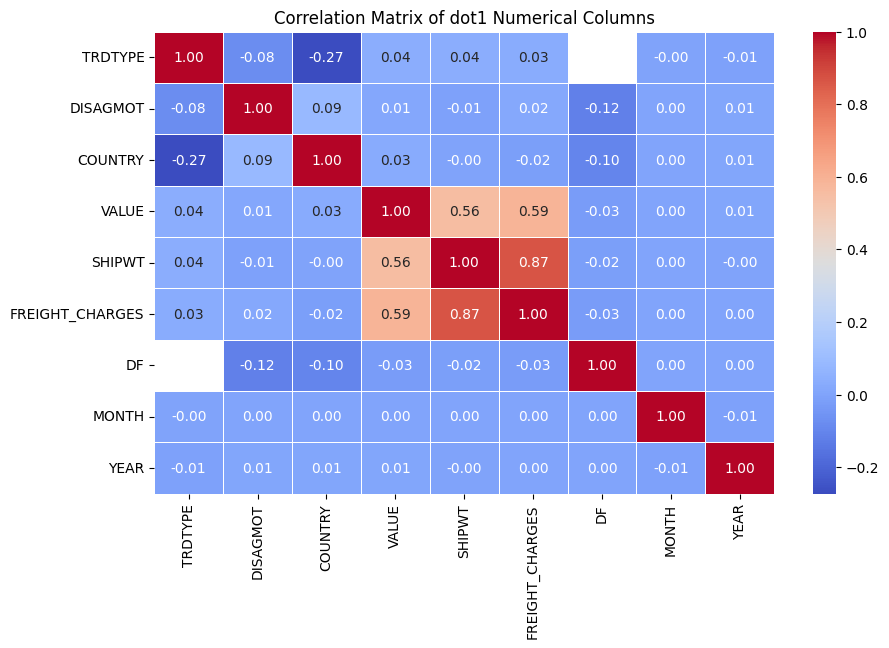

In [27]:
numeric_data = all_dot1.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of dot1 Numerical Columns")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

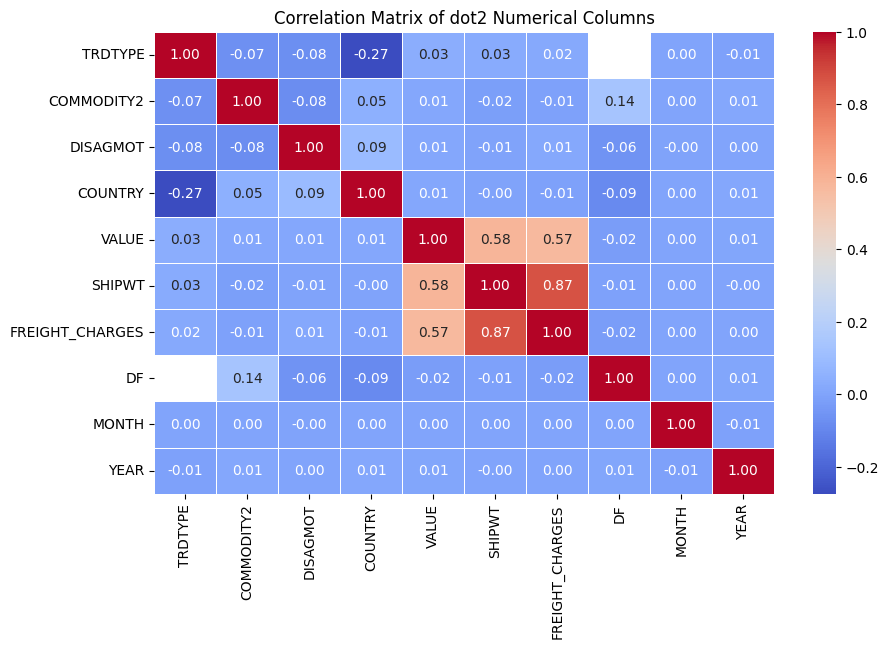

In [28]:
numeric_data = all_dot2.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of dot2 Numerical Columns")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

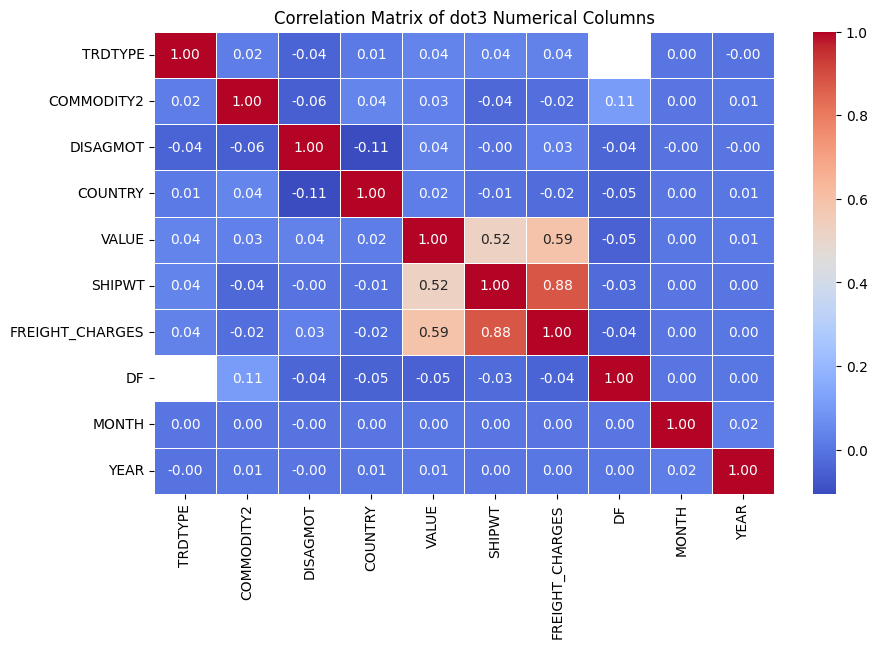

In [29]:
numeric_data = all_dot3.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of dot3 Numerical Columns")
plt.show()

<Axes: >

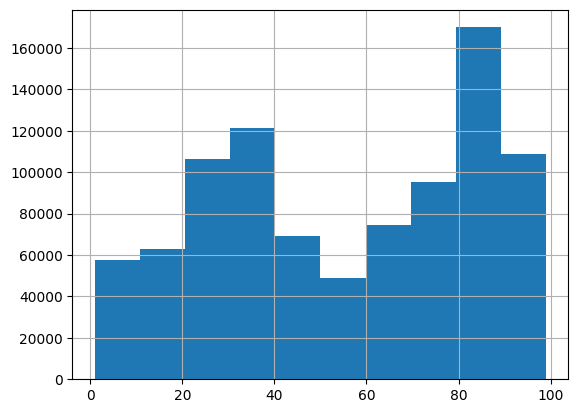

In [26]:
all_dot3['COMMODITY2'].hist()

<Axes: >

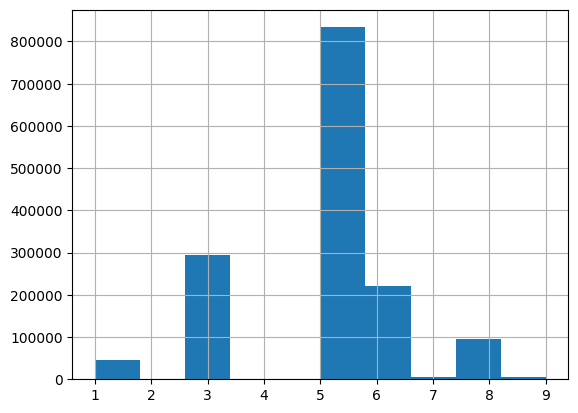

In [33]:
all_dot1['DISAGMOT'].hist()

### Join all the three datasets together

In [34]:
final_data = pd.concat([all_dot1, all_dot2, all_dot3], ignore_index = True)

<IPython.core.display.Javascript object>

In [35]:
final_data.shape

(6517225, 15)

In [36]:
final_data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020,NaN
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020,NaN
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020,NaN
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020,NaN
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020,NaN


In [37]:
final_data.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
6517220,2,NaN,55XX,5,NaN,NaN,1220,4384342,7399,1883,NaN,0,9,2024,98.0
6517221,2,NaN,55XX,8,NaN,NaN,1220,50211,6350,3500,NaN,0,9,2024,98.0
6517222,2,NaN,60XX,8,NaN,NaN,1220,793390,80,500,NaN,0,9,2024,89.0
6517223,2,NaN,70XX,8,NaN,NaN,1220,233990301,0,0,NaN,0,9,2024,99.0
6517224,2,NaN,70XX,8,NaN,NaN,2010,224981722,0,0,NaN,0,9,2024,99.0


In [38]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               float64
 11  CONTCODE         object 
 12  MONTH            int64  
 13  YEAR             int64  
 14  COMMODITY2       float64
dtypes: float64(2), int64(8), object(5)
memory usage: 745.8+ MB


In [39]:
final_data.isnull().sum()

TRDTYPE                  0
USASTATE            915116
DEPE               4101624
DISAGMOT                 0
MEXSTATE           4677264
CANPROV            3119497
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 2184568
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2         1500485
dtype: int64

In [40]:
final_data.nunique()

TRDTYPE                  2
USASTATE                52
DEPE                   246
DISAGMOT                 8
MEXSTATE                33
CANPROV                 14
COUNTRY                  2
VALUE              1708714
SHIPWT              678248
FREIGHT_CHARGES     276010
DF                       2
CONTCODE                 5
MONTH                   12
YEAR                     5
COMMODITY2              98
dtype: int64

In [41]:
final_data['TRDTYPE'].unique()

array([1, 2])

In [43]:
final_data['DISAGMOT'].unique()

array([5, 1, 3, 6, 8, 7, 4, 9])

In [44]:
final_data['COUNTRY'].unique()

array([1220, 2010])

In [45]:
final_data['DF'].unique()

array([ 2.,  1., nan])

In [46]:
final_data['MONTH'].unique()

array([ 4,  8,  2,  1,  7,  6,  3,  5,  9, 12, 11, 10])

In [47]:
final_data['CONTCODE'].unique()

array(['X', '0', '1', 0, 1], dtype=object)

### Data Mapping

In [48]:
final_data['TRDTYPE'] = final_data['TRDTYPE'].map({1: 'Export', 2: 'Import'})
final_data['DISAGMOT'] = final_data['DISAGMOT'].map({1: 'Vessel', 3: 'Air', 4: 'Mail (U.S. Postal Service)', 5: 'Truck',
                                                     6: 'Rail', 7: 'Pipeline', 8: 'Other', 9: 'Foreign Trade Zones (FTZs)'})
final_data['COUNTRY'] = final_data['COUNTRY'].map({1220: 'Canada', 2010: 'Mexico'})
final_data['DF'] = final_data['DF'].map({1.: 'domestically produced merchandise', 2.: 'foreign produced merchandise'})
final_data['MONTH'] = final_data['MONTH'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                                               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [49]:
final_data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,AK,0115,Truck,NaN,XB,Canada,4660,0,67,foreign produced merchandise,X,April,2020,NaN
1,Export,AK,0901,Truck,NaN,XO,Canada,14360,0,282,domestically produced merchandise,X,April,2020,NaN
2,Export,AK,20XX,Vessel,XX,NaN,Mexico,4293733,24971000,0,domestically produced merchandise,0,April,2020,NaN
3,Export,AK,20XX,Air,NaN,XA,Canada,28283,443,563,domestically produced merchandise,X,April,2020,NaN
4,Export,AK,20XX,Air,NaN,XA,Canada,29848,69,538,foreign produced merchandise,X,April,2020,NaN


---
For CONTCODE (Container Code), 'X' means **Containerized** and '0' means **Non-Containerized.** There is no match for '1' hence, I assume it to be ***Unknown***

In [50]:
final_data['CONTCODE'] = final_data['CONTCODE'].replace({'X': 'Containerized', '0': 'Non-Containerized',
                                                         0: 'Non-Containerized', '1': 'Unknown', 1: 'Unknown'})

In [51]:
final_data['CONTCODE'].unique()

array(['Containerized', 'Non-Containerized', 'Unknown'], dtype=object)

---
- There were 99 commodities indicated in the data dictionary, however, checks for the number of unique values in the commodity column indicated only 98.
- Let's find out which commodity is not present in the data.

In [52]:
expected_comm_values = set(range(1, 100))
actual_comm_values = set(final_data['COMMODITY2'].dropna().unique())

missing_comm_values = expected_comm_values - actual_comm_values
print("Missing Commodity Value:", missing_comm_values)

Missing Commodity Value: {77}


- Commodity number 77 which is **'Reserved for possible future use'** has no records in the dataset.
- Perhaps no such commodity was transported.

---

In [53]:
final_data['USASTATE'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'DU', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', nan], dtype=object)

In [54]:
all_dot2['MEXSTATE'].unique()

array(['NL', nan, 'XX', 'OT', 'GT', 'CM', 'BC', 'CH', 'JA', 'BS', 'QT',
       'SL', 'MX', 'CO', 'SO', 'HG', 'PU', 'DF', 'DG', 'TM', 'AG', 'MO',
       'ZA', 'TL', 'VE', 'MI', 'SI', 'YU', 'TB', 'CS', 'CL', 'GR', 'QR',
       'OA'], dtype=object)

* There is no state that matches 'XX', therefore, I will assume all states marked 'XX' is unknown and mark it 'OT'

In [55]:
final_data['MEXSTATE'] = final_data['MEXSTATE'].replace({'XX': 'OT'})

In [56]:
final_data['MEXSTATE'].unique()

array([nan, 'OT', 'CO', 'NL', 'CH', 'CM', 'GT', 'JA', 'MX', 'QT', 'SL',
       'BC', 'BS', 'DF', 'TM', 'ZA', 'DG', 'HG', 'SO', 'AG', 'MI', 'MO',
       'PU', 'TL', 'VE', 'SI', 'YU', 'TB', 'CS', 'CL', 'OA', 'QR', 'GR'],
      dtype=object)

In [57]:
final_data['CANPROV'].unique()

array(['XB', 'XO', nan, 'XA', 'XC', 'XM', 'XQ', 'XY', 'XW', 'XS', 'XN',
       'XP', 'OT', 'XT', 'XV'], dtype=object)

In [58]:
final_data.nunique()

TRDTYPE                  2
USASTATE                52
DEPE                   246
DISAGMOT                 8
MEXSTATE                32
CANPROV                 14
COUNTRY                  2
VALUE              1708714
SHIPWT              678248
FREIGHT_CHARGES     276010
DF                       2
CONTCODE                 3
MONTH                   12
YEAR                     5
COMMODITY2              98
dtype: int64

In [59]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          object 
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         object 
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          object 
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               object 
 11  CONTCODE         object 
 12  MONTH            object 
 13  YEAR             int64  
 14  COMMODITY2       float64
dtypes: float64(1), int64(4), object(10)
memory usage: 745.8+ MB
